In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Animal Crossing EDA

In [2]:
villager_rankings = pd.read_csv('/Users/KaryLy/Desktop/datasets/acnh_villager_data.csv')

In [3]:
villager_list = pd.read_csv('/Users/KaryLy/Desktop/datasets/villagers.csv')

In this project, I will be exploring which traits make certain villagers more popular than others. 
Each villager has their own characteristics including gender, personality type, hobbies, and birthdays.
Given the information from the datasets, what common characterstics can we find among the popular villagers?
We will explore the following questions:
1. What is the most common gender of the popular villagers and all the villagers?
2. What personality trait is most common of the popular villagers and all the villagers?
3. What is the most common villager species among popular villagers and all the villagers?
4. Does the number one most popular villager have these characteristics? 
5. What percentage of the 10 most popular villagers have these characteristics?

The datasets I will be using were provided by users Jessica Li and Ampi on Kaggle.

https://www.kaggle.com/datasets/jessicali9530/animal-crossing-new-horizons-nookplaza-dataset

https://www.kaggle.com/datasets/ampiiere/acnh-villager-popularity

In [5]:
villager_rankings.head()

,tier,rank,name
0,1,1,Raymond
1,1,2,Marshal
2,1,3,Shino
3,1,4,Sherb
4,1,5,Sasha


In [6]:
villager_list.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


The first dataset consists of three columns: "tier", "rank", and "name". It ranks the villagers in tiers, and the ranking is reset to 1 at the end of a tier. For example, there are 15 villagers in tier 1, ranked 1-15. Then the tier is 2 and rankings are reset to 1. The "Highest Popularity" tier contains 15 villagers. The "Very Popular" tier contains 25 villagers. The "Fairly Popular" tier contains 30 villagers. The "Middle Ground" tier contains 60 villagers. The "Less Popular" tier contains 120 villagers. The "Least Popular" tier contains 163 villagers. The "name" column corresponds to the name of the villager. The second dataset contains 17 columns. These columns all correspond to different traits of the villagers.

In [7]:
# get the number of villager names in villager_rankings
rank_list = villager_rankings['name'].unique()
len(rank_list)

413

In [8]:
# get the number of villager names in villager_list
list = villager_list['Name'].unique()
len(list)

391

villager_rankings and villager_list don't have the same amount of villagers, so we need to figure out 
which names are missing.

In [9]:
no_match = [name for name in villager_rankings['name'].unique() if name not in villager_list['Name'].unique()]
no_match.sort()
no_match

['Ace',
 'Azalea',
 'Buck(Brows)',
 'Cephalobot',
 'Chabwick',
 'Chai',
 'Chelsea',
 'Crackle(Spork)',
 'Faith',
 'Frett',
 'Ione',
 'Marlo',
 'Marty',
 'OHare',
 'Petri',
 'Quinn',
 'Renee',
 'Rilla',
 'Rio',
 'Roswell',
 'Sasha',
 'Shino',
 'Tiansheng',
 'Toby',
 'WartJr',
 'Zoe',
 'Étoile']

There are 22 missing names from villager_list and 27 names that don't match. This will be an issue when merging the tables together, so we need to rename the non-matching names.

In [10]:
mismatch = [name for name in villager_list['Name'].unique() if name not in villager_rankings['name'].unique()]
mismatch.sort()
mismatch

['Buck', "O'Hare", 'Renée', 'Spork', 'Wart Jr.']

Some of the names don't exist in villager_list, but some do exist and the string doesn't exactly match (e.g. 
"Buck(Brows)" and "Buck").

In [11]:
# Now that we know which names mismatch, we can rename them.
villager_rankings['name'] = villager_rankings['name'].replace({"Buck(Brows)": "Buck", "OHare": "O'Hare", "Renee": "Renée", "Crackle(Spork)": "Spork",
                              "WartJr": "Wart Jr."})

As stated before, for names that don't exist in villager_list, we won't include them in the data because we don't 
have information on their characteristics. We'll do this by dropping the values.

In [12]:
for name in villager_list['Name'].unique():
    if name not in villager_rankings['name'].unique():
        villager_list['Name'].drop(name)

The way villager_rankings ranks the villagers isn't really sufficient for our EDA. It ranks the villagers in tiers,
and the ranking is reset to 1 at the end of a tier. For example, there are 15 villagers in tier 1, ranked 1-15. 
Then the tier is 2 and rankings are reset to 1. To make our EDA easier, we need to rank the villagers from 1-391.
To do this, we can add a new column titled, "Popularity Rank."

In [13]:
villager_rankings['Popularity Rank'] = np.arange(1, villager_rankings.shape[0] + 1)
villager_rankings.head()

,tier,rank,name,Popularity Rank
0,1,1,Raymond,1
1,1,2,Marshal,2
2,1,3,Shino,3
3,1,4,Sherb,4
4,1,5,Sasha,5


In [14]:
# In order to merge the dataframes on names, we need to rename the "name" or "Name" columns to match each other.
villager_rankings.rename(columns = {'name': 'Name'}, inplace=True)
villager_info = villager_rankings.merge(villager_list, on='Name')
df = villager_info[['Name', 'Popularity Rank', 'Species', 'Gender', 'Personality', 'Hobby', 'Style 1', 'Style 2']]
df.sort_values(by=['Popularity Rank'], ascending=True)
df.head()

,Name,Popularity Rank,Species,Gender,Personality,Hobby,Style 1,Style 2
0,Raymond,1,Cat,Male,Smug,Nature,Elegant,Cool
1,Marshal,2,Squirrel,Male,Smug,Music,Elegant,Cool
2,Sherb,4,Goat,Male,Lazy,Nature,Simple,Cute
3,Ankha,7,Cat,Female,Snooty,Nature,Gorgeous,Simple
4,Zucker,8,Octopus,Male,Lazy,Nature,Simple,Cute


We can now perform our data analysis

Let's tackle the first question:

What is the most common gender of the popular villagers and all the villagers?

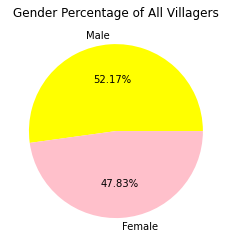

In [15]:
common_gender = df['Gender'].value_counts()
plt.pie(common_gender, autopct='%0.2f%%', colors=['yellow', 'pink'], labels=common_gender.index)
plt.title('Gender Percentage of All Villagers');

The most common gender is male, but it's almost an even split.

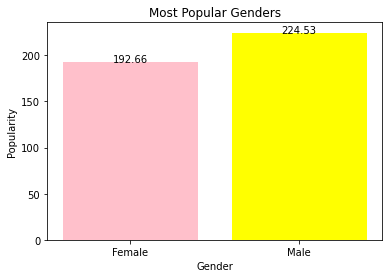

In [16]:
popular_gender = df.groupby('Gender').mean()
plt.bar(popular_gender.index, popular_gender['Popularity Rank'], color= ['pink', 'yellow'])
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], format(y[i], '0.2f'), ha = 'center')
plt.title('Most Popular Genders')
plt.xlabel('Gender')
plt.ylabel('Popularity')
addlabels(popular_gender.index, popular_gender['Popularity Rank']);

The most common gender of the popular villagers is female. Keep in mind that the lower the popularity score, the higher the popularity because the rankings are ordered by ascending.

What personality trait is most common of the popular villagers and all the villagers?

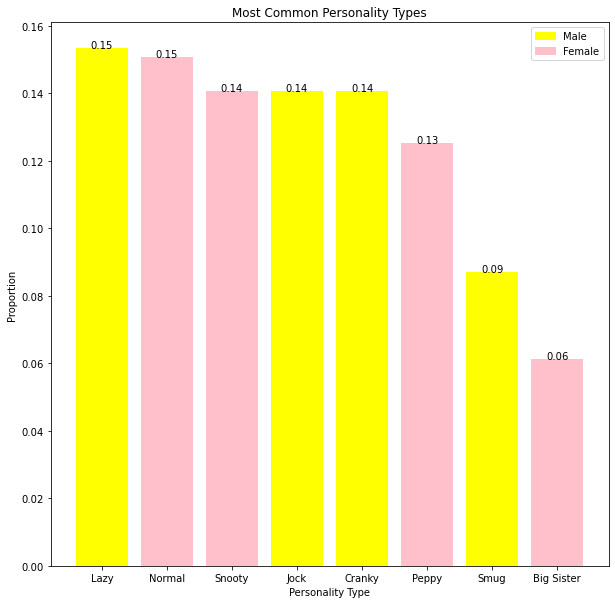

In [22]:
proportion_personality = df['Personality'].value_counts() / len(df['Personality'])
colors = ['yellow', 'pink', 'pink', 'yellow', 'yellow', 'pink', 'yellow', 'pink']
plt.figure(figsize=(10,10))
plt.bar(proportion_personality.index, proportion_personality, color=colors)
plt.title('Most Common Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Proportion')
addlabels(proportion_personality.index, proportion_personality)

yellow_patch = mpatches.Patch(color='yellow', label='Male')
pink_patch = mpatches.Patch(color='Pink', label='Female')
plt.legend(handles=[yellow_patch, pink_patch])
plt.show();

The most common personality types, from most common to least common are: lazy, normal, snooty, jock, cranky, peppy, smug, and big sister.

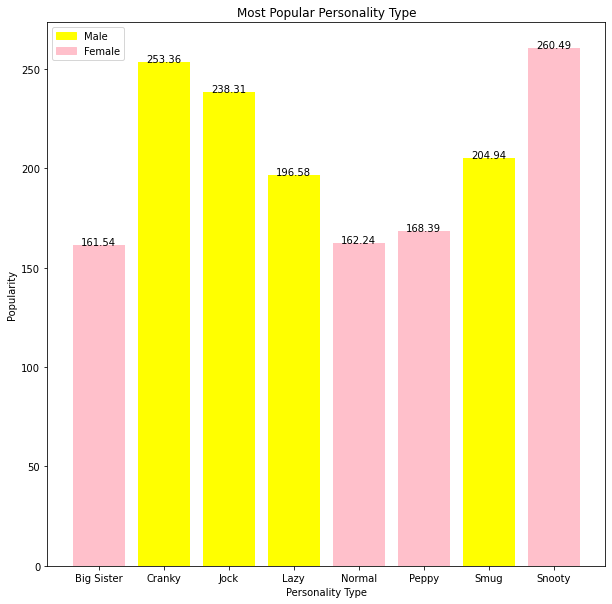

In [23]:
average_personality = df.groupby('Personality').mean()
colors = ['pink', 'yellow', 'yellow', 'yellow', 'pink', 'pink', 'yellow', 'pink']
plt.figure(figsize=(10,10))
plt.bar(average_personality.index, average_personality['Popularity Rank'], color=colors)
addlabels(average_personality.index, average_personality['Popularity Rank'])
plt.title('Most Popular Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Popularity')
plt.legend(handles=[yellow_patch, pink_patch])
plt.show();

The most popular personality types are, from most popular to least popular: normal, big sister, peppy, lazy, smug, jock, cranky, snooty.

What is the most common villager species among popular villagers and all the villagers?

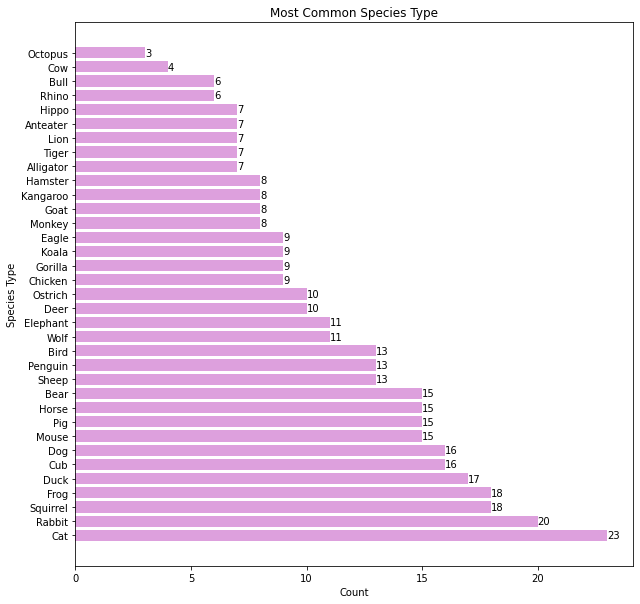

In [42]:
species_count = df['Species'].value_counts()
plt.figure(figsize=(10,10))
ax = plt.barh(species_count.index, species_count, color='plum')
plt.bar_label(ax)
plt.title('Most Common Species Type')
plt.ylabel('Species Type')
plt.xlabel('Count')
plt.show();

The five most common species are cat, rabbit, squirrel, frog, and duck. The five least common are octopus, cow, bull, rhino, and hippo.

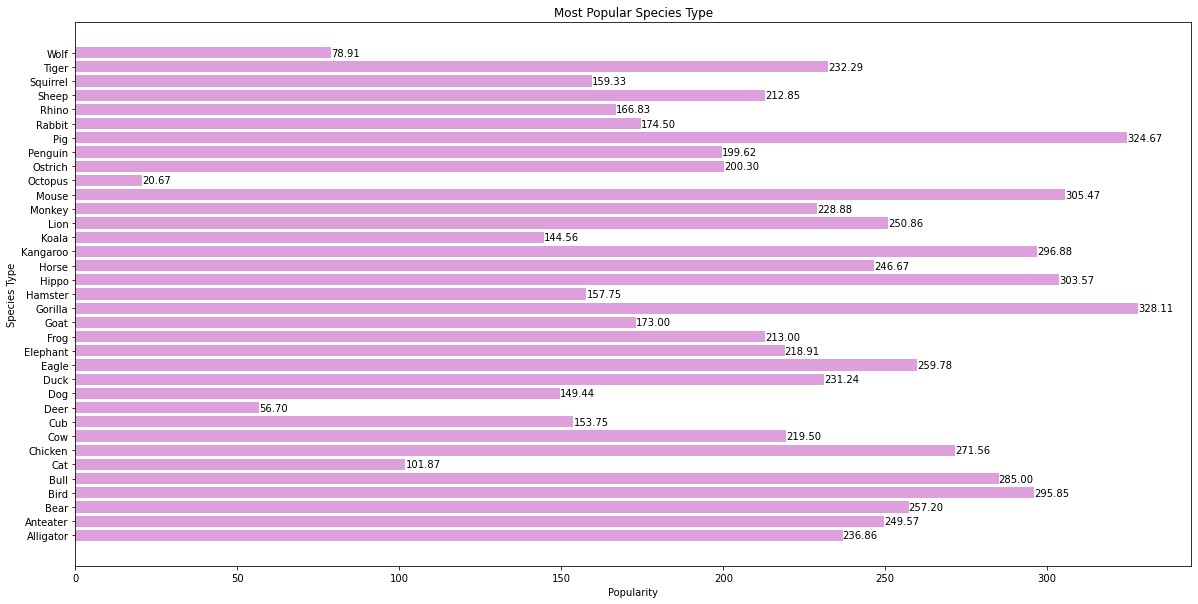

In [43]:
popular_species = df.groupby('Species').mean()
popular_species.sort_values('Popularity Rank')
plt.figure(figsize=(20,10))
ax = plt.barh(popular_species.index, popular_species['Popularity Rank'], color='plum')
plt.bar_label(ax, fmt='%0.2f')
plt.title('Most Popular Species Type')
plt.ylabel('Species Type')
plt.xlabel('Popularity')
plt.show();

The five most popular species are, from most to least: octopus, deer, wolf, cat, and koala. One observation we can make is that octopus is the least common species, but the most popular. 

What is the most common hobby among popular villagers and all the villagers?

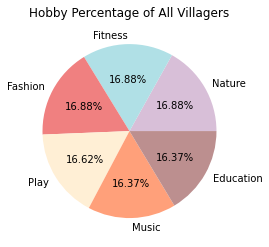

In [25]:
common_hobby = df['Hobby'].value_counts()
plt.pie(common_hobby, colors=['thistle', 'powderblue', 'lightcoral', 'papayawhip', 'lightsalmon', 'rosybrown'], autopct='%0.2f%%', labels=common_hobby.index)
plt.title('Hobby Percentage of All Villagers');

The three most common hobbies are fashion, fitness, and nature.

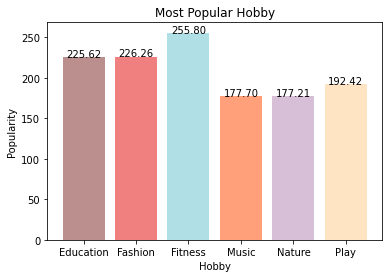

In [26]:
popular_hobby = df.groupby('Hobby').mean()
popular_hobby.sort_values('Popularity Rank')
colors = ['rosybrown', 'lightcoral', 'powderblue', 'lightsalmon', 'thistle', 'bisque']
plt.bar(popular_hobby.index, popular_hobby['Popularity Rank'], color=colors)
addlabels(popular_hobby.index, popular_hobby['Popularity Rank'])
plt.title('Most Popular Hobby')
plt.xlabel('Hobby')
plt.ylabel('Popularity');

The three most popular hobbies are music, nature, and play.

What is the most common style among popular villagers and all the villagers?

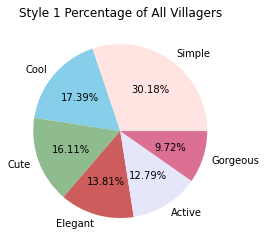

In [34]:
common_style_1 = df['Style 1'].value_counts()
plt.pie(common_style_1, colors=['mistyrose', 'skyblue', 'darkseagreen', 'indianred', 'lavender', 'palevioletred'], autopct='%0.2f%%', labels=common_style_1.index)
plt.title('Style 1 Percentage of All Villagers');

The most common first style of the villagers is simple, followed by cool, cute, elegant, active, and gorgeous.

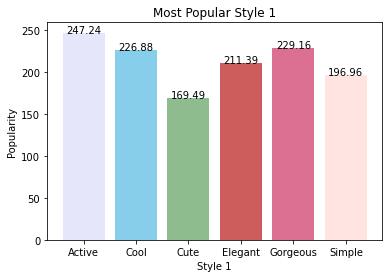

In [35]:
style_1_popular = df.groupby('Style 1').mean()
style_1_popular.sort_values('Popularity Rank')
colors = ['lavender', 'skyblue', 'darkseagreen', 'indianred', 'palevioletred', 'mistyrose']
plt.bar(style_1_popular.index, style_1_popular['Popularity Rank'], color=colors)
addlabels(style_1_popular.index, style_1_popular['Popularity Rank'])
plt.title('Most Popular Style 1')
plt.xlabel('Style 1')
plt.ylabel('Popularity');

The most popular first style of the villagers is cute, followed by simple, elegant, cool, gorgeous, and active.

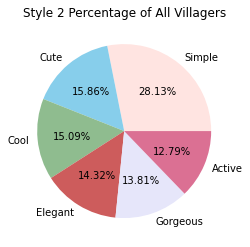

In [41]:
common_style_2 = df['Style 2'].value_counts()
plt.pie(common_style_2, colors= ['mistyrose', 'skyblue', 'darkseagreen', 'indianred', 'lavender', 'palevioletred'], autopct='%0.2f%%', labels=common_style_2.index)
plt.title('Style 2 Percentage of All Villagers');

The most common second style of the villagers is simple, followed by cute, cool, elegant, gorgeous, and active.

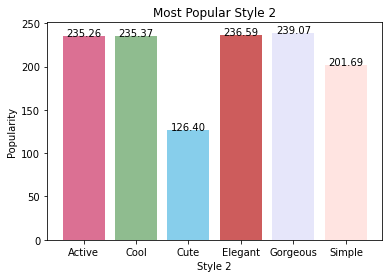

In [43]:
style_2_popular = df.groupby('Style 2').mean()
style_2_popular.sort_values('Popularity Rank')
colors = ['palevioletred', 'darkseagreen', 'skyblue', 'indianred', 'lavender', 'mistyrose']
plt.bar(style_2_popular.index, style_2_popular['Popularity Rank'], color=colors)
addlabels(style_2_popular.index, style_2_popular['Popularity Rank'])
plt.title('Most Popular Style 2')
plt.xlabel('Style 2')
plt.ylabel('Popularity');

The most popular second style is cute, followed by simple, active, cool, elegant, and gorgeous.

Does the number one most popular villager have these characteristics?

In [44]:
df.head(1)

,Name,Popularity Rank,Species,Gender,Personality,Hobby,Style 1,Style 2
0,Raymond,1,Cat,Male,Smug,Nature,Elegant,Cool


We can see that the number one most popular villager is Raymond. Of the most popular villagers, the most common
traits are: female, big sister, octopus, nature, cute, and cute. These traits are quite different from Raymond's 
aside from the nature hobby, but his ranking is not too surprising. Cats are the 4th most popular species and 
smug personality types are the second most popular among male villagers. Overall, while Raymond's characteristics 
don't completely match the most common traits of the top popular villagers, his popularity can be attributed to 
various factors such as being a cat villager, possessing a smug personality (a popular choice among male 
villagers), and sharing the nature hobby, which is a prevalent characteristic among the popular villagers. 
These factors collectively contribute to his high ranking and appeal to players.

What percentage of the most popular villagers have these characteristics?

In [46]:
# Let's take the first 10 most popular villagers
top_10 = df.head(10)
top_10

,Name,Popularity Rank,Species,Gender,Personality,Hobby,Style 1,Style 2
0,Raymond,1,Cat,Male,Smug,Nature,Elegant,Cool
1,Marshal,2,Squirrel,Male,Smug,Music,Elegant,Cool
2,Sherb,4,Goat,Male,Lazy,Nature,Simple,Cute
3,Ankha,7,Cat,Female,Snooty,Nature,Gorgeous,Simple
4,Zucker,8,Octopus,Male,Lazy,Nature,Simple,Cute
5,Stitches,9,Cub,Male,Lazy,Play,Simple,Cute
6,Merengue,10,Rhino,Female,Normal,Nature,Cute,Simple
7,Marina,11,Octopus,Female,Normal,Music,Cute,Cute
8,Judy,12,Cub,Female,Snooty,Music,Cute,Elegant
9,Beau,13,Deer,Male,Lazy,Nature,Simple,Cute


In [47]:
# What percentage are female?
female = top_10.where(top_10['Gender'] == 'Female').dropna()
female_percentage = len(female) / len(top_10) * 100
female_percentage

40.0

In [48]:
# What percentage have big sister personalities?
big_sister = top_10.where(top_10['Personality'] == 'Big Sister').dropna()
big_sister_percentage = len(big_sister) / len(top_10) * 100
big_sister_percentage

0.0

In [49]:
# What percentage are octopuses?
octopus = top_10.where(top_10['Species'] == 'Octopus').dropna()
octopus_percentage = len(octopus) / len(top_10) * 100
octopus_percentage

20.0

In [50]:
# What percentage have nature as their hobby?
nature = top_10.where(top_10['Hobby'] == 'Nature').dropna()
nature_percentage = len(nature) / len(top_10) * 100
nature_percentage

60.0

In [51]:
# What percentage have cute as style 1?
cute_style_1 = top_10.where(top_10['Style 1'] == 'Cute').dropna()
cute_style_1_percentage = len(cute_style_1) / len(top_10) * 100
cute_style_1_percentage

30.0

In [52]:
# What percentage have cute as style 2?
cute_style_2 = top_10.where(top_10['Style 2'] == 'Cute').dropna()
cute_style_2_percentage = len(cute_style_2) / len(top_10) * 100
cute_style_2_percentage

50.0

Out of the top 10 most popular villagers, the percentages are characteristics are:
- Female: 40%
- Big sister: 0%
- Octopus: 20%
- Nature: 60%
- Cute style 1: 30%
- Cute style 2: 50%

Although these are the most popular characteristics, out of the top 10 popular villagers, only 40% are female. 
It suggests that players have a preference for both male and female villagers, as there is not a dominant majority 
of either gender among the top choices. 0% have big sister personalities. This could suggest that players might 
not find this particular personality trait appealing or that other personality types are more favored
30% have cute as style 1. This suggests that while cuteness is a popular characteristic, it might not be the 
primary factor driving the popularity of villagers in the top rankings.
50% have cute as style 2. Half of the top 10 popular villagers have the cute style 2, indicating that cuteness 
is still a significant factor in the selection of popular villagers.
It is surprising that out of the 10 most popular villagers, 3/6 characteristics aren't noticably present. 
This suggests that popularity is not solely determined by these specific characteristics, and other factors 
such as individual preferences, unique designs, and personal interactions with villagers may play a 
significant role in the selection process.